In [1]:
from keras.models import Sequential
from keras.layers import *

from IPython.display import Image

from keras.datasets import mnist, cifar10
from keras.optimizers import Adam, SGD

from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

## MNIST dataset of handwritten digits.

Step #1: Import and and split the data into training/testing

11490434/11490434 [==============================] - 0s 0us/step


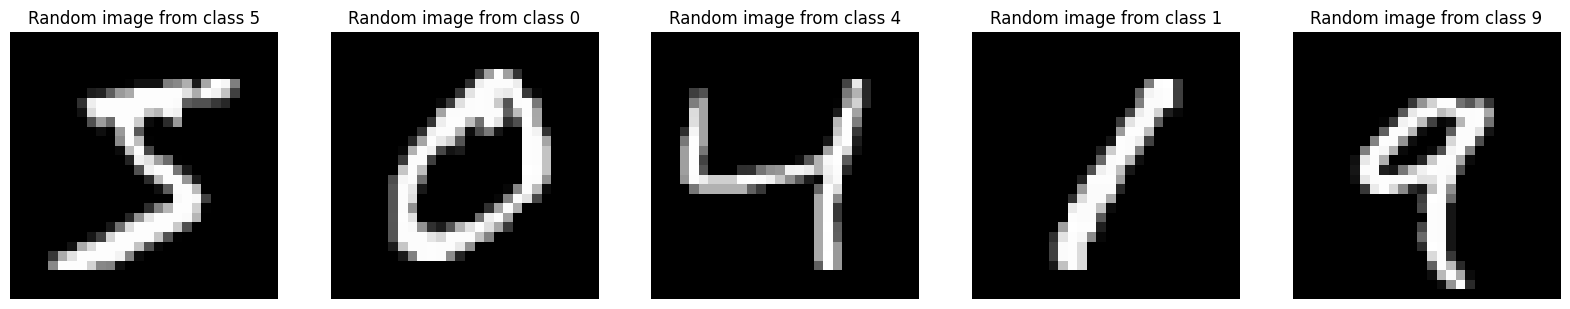

In [2]:
# import
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Show a few images from the dataset
plt.figure(figsize=(20,5))
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title(f"Random image from class {y_train[i]}")
  plt.imshow(x_train[i], cmap='gray')
  plt.axis("off")

plt.show()

# Convert labels to categorical for loss function evaluation.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


x_train = x_train / 255
x_test = x_test / 255

Step #2: Determine the dimensions of the data

Use x_train.shape to see what the dimensions of the data is. If it has more than two dimensions, it must be flattened during step #3.

If the .shape method returned the tuple (10,5), this would tell us that there are 10 data points each with 5 values. This would not need to be flattened.

If instead the .shape method returns the tuple (10,5,2), it would need to be flattened so that instead of each datapoint being a (5,2) matrix it is a (10,0) flat array.



In [3]:
x_train.shape #(60000, 28, 28)

(60000, 28, 28)

Step #3: Initialize the Network Model

In [4]:
# Build the model
model = Sequential()

Step #4: Add an input layer to the model

In [5]:
model.add(Flatten(input_shape = (28, 28)))

Step #5: Add the hidden layer to the model

For this model we will start with one hidden layer of size 256 and activation function 'relu'.

In [6]:
model.add(Dense(256, activation='relu'))

Step #6: Add the output layer

We need our model to pick one of 10 classes.

Therefore, we need our ouput layer to have 10 nodes and an activation = "softmax".

In [7]:
model.add(Dense(10, activation='softmax'))

Next Steps (7):
- Select the optimizer: Use Stochastic Gradient Descent and set the learning rate to 0.01.

- Compile the model: Compile your model using a loss="categorical_crossentropy" and the metric=[accuracy].

- Fit the model with the data: Set the number of training epochs and the batch size. Fit your model over 5 epochs and with a batch size of 64

In [8]:
# Set the Optimizer and Learning Rate
opt = SGD(learning_rate=0.01)

# Compile the DNN
model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

# Fit the model
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 4s 4ms/step - loss: 0.8458 - accuracy: 0.7978
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.4078 - accuracy: 0.8908
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3439 - accuracy: 0.9051
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3111 - accuracy: 0.9126
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.2890 - accuracy: 0.9189


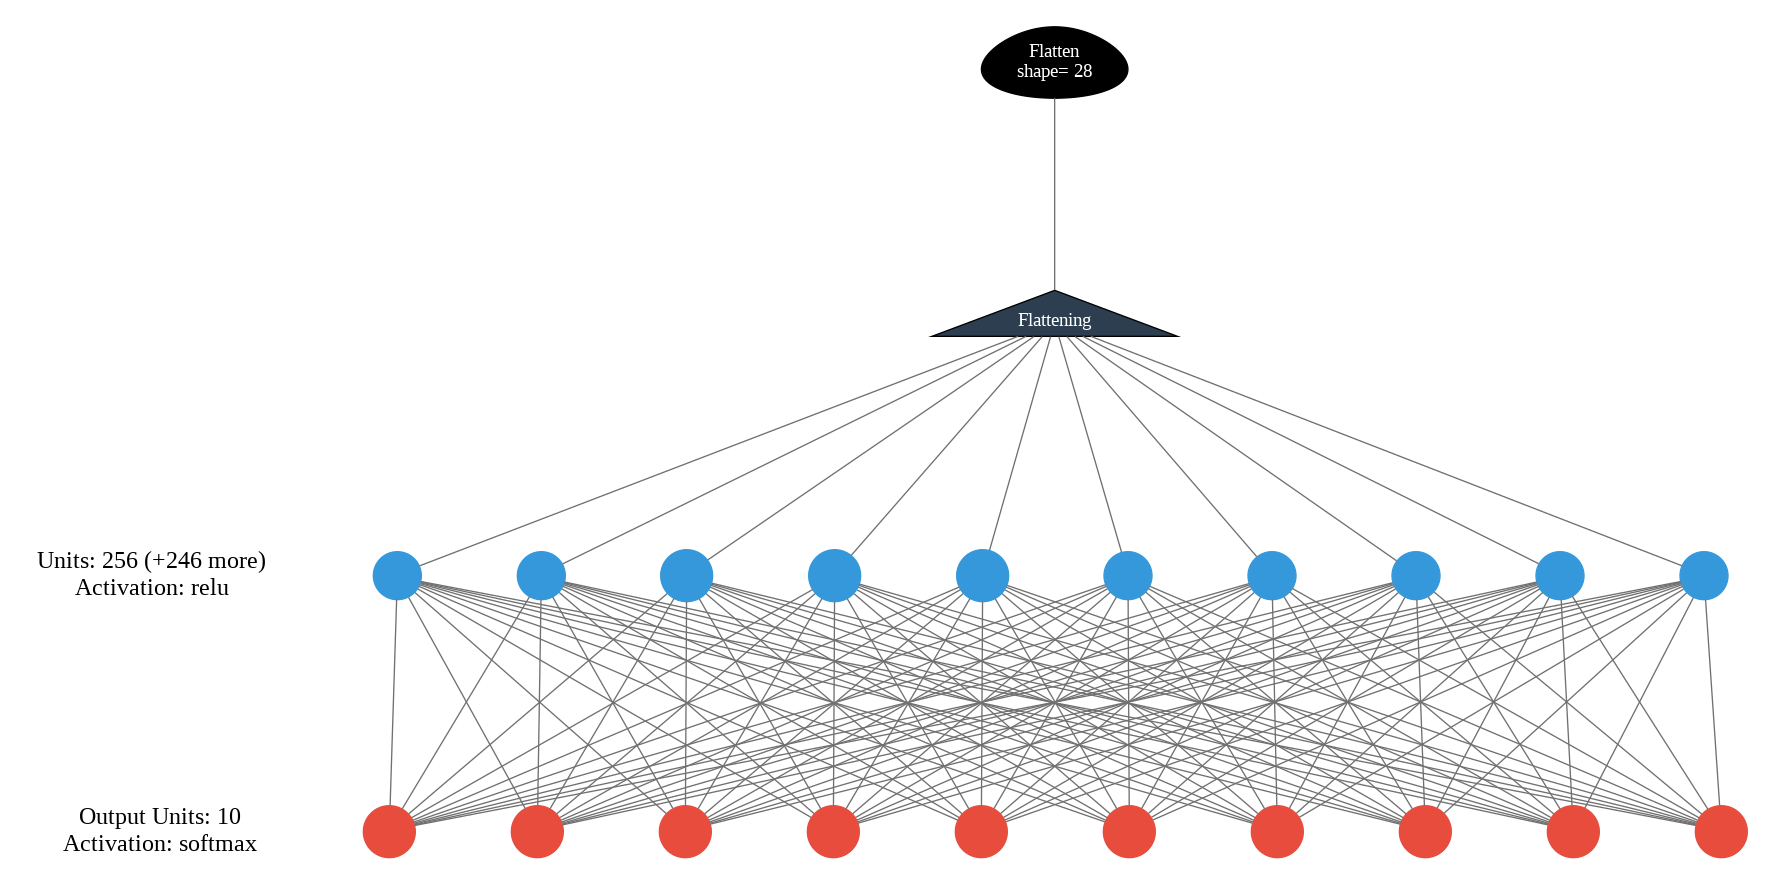

In [ ]:
!pip install --quiet keras_visualizer
from keras_visualizer import visualizer
from IPython.display import Image

visualizer(model, 
	file_name="model", 
	file_format='png')
Image("model.png")# Visualizing the network


Step #8: Evaluate the model

We can use the model.evaluate(x_data, y_data)[1] to get the value of correctly classified x_data points. We can multiply this value by 100 to get the percentage of correctly classified datapoints.

In [ ]:
correct_x_train = model.evaluate(x_train, y_train)[1]
correct_x_test = model.evaluate(x_test, y_test)[1]

print(f"Train Accuracy: {correct_x_train*100}%")
print(f"Test Accuracy: {correct_x_test*100}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.2690 - accuracy: 0.9260
Train Accuracy: 92.28333234786987%
Test Accuracy: 92.59999990463257%


In [ ]:
model.evaluate(x_test, y_test)[1]

313/313 [==============================] - 2s 5ms/step - loss: 0.2690 - accuracy: 0.9260


0.9259999990463257

Step #9: Visualize the model's predictions

313/313 [==============================] - 1s 2ms/step


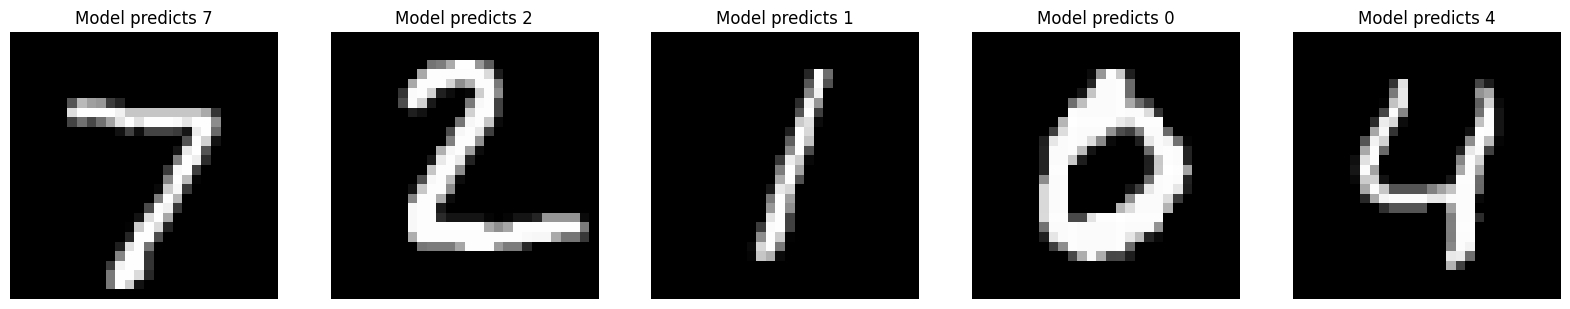

In [ ]:
# Make predictions and convert from probabilities of each digit to single digit
predictions = [np.argmax(d) for d in np.round(model.predict(x_test))]

# Plot images with predicted labes
plt.figure(figsize=(20,5))

for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.title(f"Model predicts {predictions[i]}")
  plt.imshow(x_test[i], cmap='gray')
  plt.axis("off")

plt.show()

__Build the same model__

In [ ]:
# Create model
model2 = Sequential()

# Input (Flatten) Layer
model2.add(Flatten(input_shape = (28, 28)))

# Hidden Layer
model2.add(Dense(256, activation='relu'))

# Output Layer
model2.add(Dense(10, activation='softmax'))

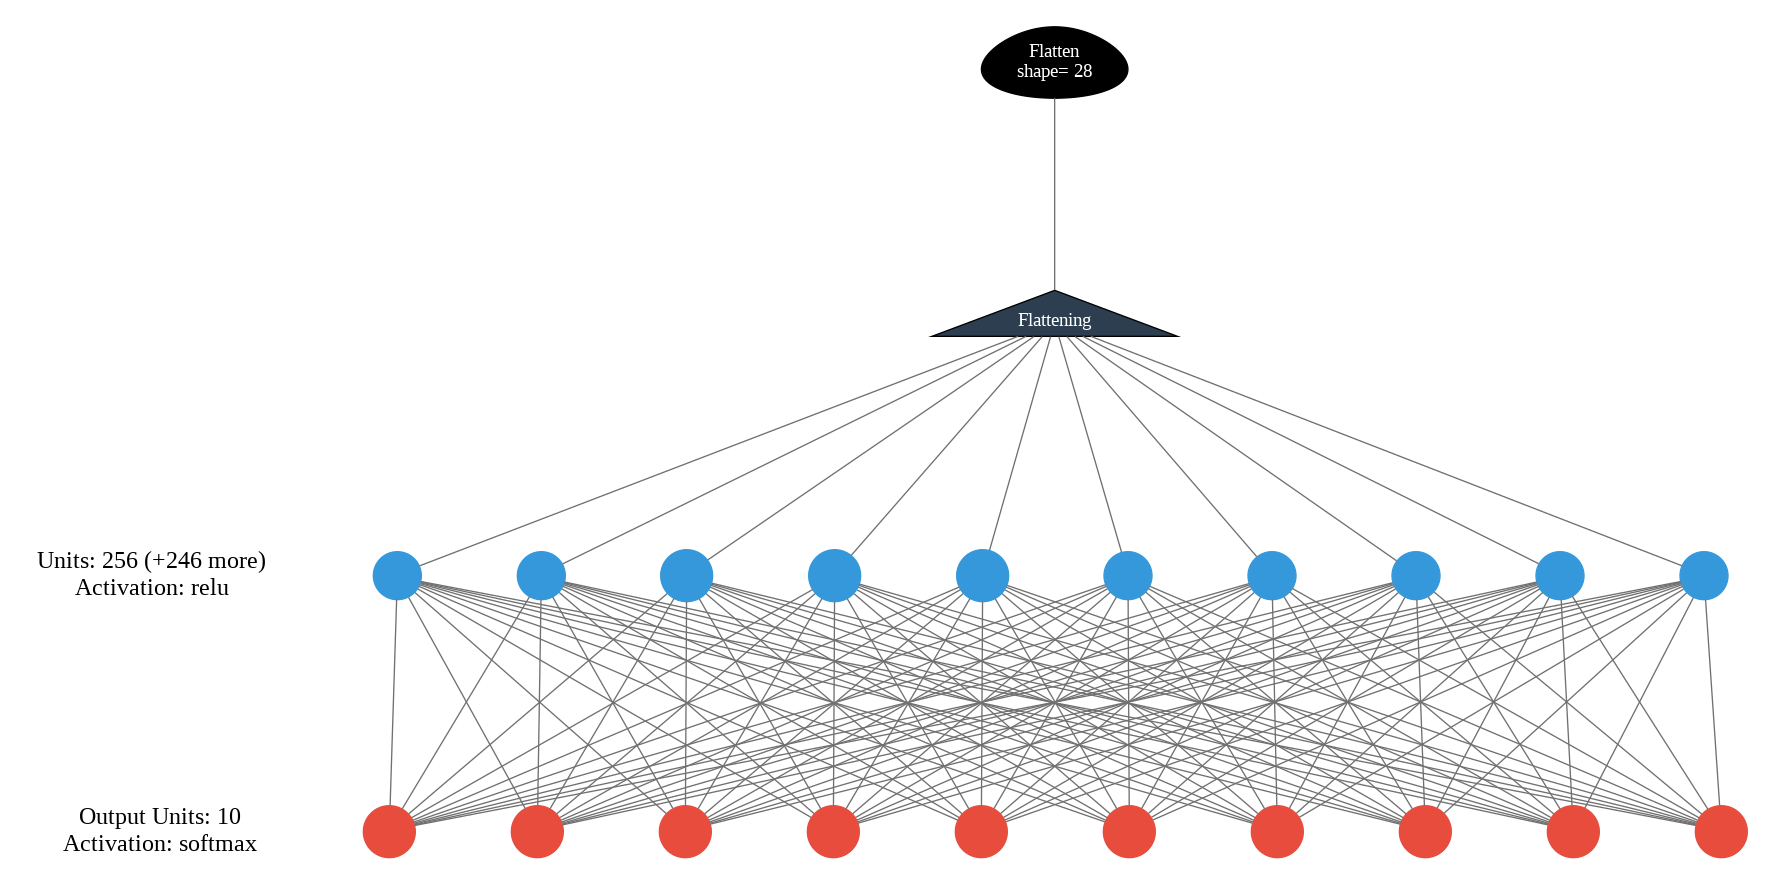

In [ ]:
visualizer(model2, 
	file_name="model", 
	file_format='png')
Image("model.png")# Visualizing the network

In [ ]:
# Set the Optimizer and Learning Rate
opt = Adam(learning_rate=0.01)

# Compile the DNN
model2.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

# Fit the model
model2.fit(x_train, y_train, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0818 - accuracy: 0.9826
Epoch 2/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0713 - accuracy: 0.9854
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0618 - accuracy: 0.9868
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0652 - accuracy: 0.9867
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0604 - accuracy: 0.9874
Epoch 6/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0636 - accuracy: 0.9868
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0614 - accuracy: 0.9884
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0569 - accuracy: 0.9888
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0622 - accuracy: 0.9890
Epoch 10/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0579 - accuracy: 0.9890

In [ ]:
correct_x_train = model2.evaluate(x_train, y_train)[1]
correct_x_test = model2.evaluate(x_test, y_test)[1]

print(f"Train Accuracy: {correct_x_train*100}%")
print(f"Test Accuracy: {correct_x_test*100}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.2947 - accuracy: 0.9731
Train Accuracy: 99.21333193778992%
Test Accuracy: 97.31000065803528%
